<font size="5"><b>A) KNN(Sklearn) on Categorical data using Label Encoding and Hamming Distance :</b></font>

In [1]:
# after removing data row as index row and changing column names
import pandas as pd
import numpy as np
df=pd.read_csv('C:\\Users\\soham\\Downloads\\adult.data',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'],header=None)
df 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
#replacing "?" by np.nan
df=df.replace(' ?',np.nan)
#replace missing values by mean,mode
for i in df.columns:
    if (type(df[i].dropna().tolist()[0])==str): #we are checking type of first value of each column after dropping NA's from it.
        df[i]=df[i].fillna(df[i].mode()[0])   #So, no problem even if first value of column turns out to be missing
    elif (type(df[i].dropna().tolist()[0])==float):  #we are checking type of first available element of that column using dropna 
        df[i]=df[i].fillna(df[i].mean())
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
#creating a dataframe with only string type columns
dfobj=pd.DataFrame()
for i in df.columns:
    if (type(df[i].tolist()[0])==str):
        dfobj[i]=df[i].tolist()
dfobj

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [4]:
#apply label encoding to convert categorical data to integer data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [5]:
dfobj_le=pd.DataFrame()
for i in dfobj.columns:
    if i != 'income' :
        dfobj_le[i]=le.fit_transform(dfobj.loc[:,i])
    
dfobj_le

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,6,9,4,0,1,4,1,38
1,5,9,2,3,0,4,1,38
2,3,11,0,5,1,4,1,38
3,3,1,2,5,0,2,1,38
4,3,9,2,9,5,2,0,4
5,3,12,2,3,5,4,0,38
6,3,6,3,7,1,2,0,22
7,5,11,2,3,0,4,1,38
8,3,12,4,9,1,4,0,38
9,3,9,2,3,0,4,1,38


In [6]:
#performing train-test-split on our dataframe
# X consists of only integer type columns, y consists of output column("income")
import numpy as np
from sklearn.model_selection import train_test_split
X, y = dfobj_le.iloc[:,:],dfobj.iloc[:,[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [7]:
X_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
11928,3,9,2,4,0,4,1,38
25343,3,15,0,6,4,4,0,38
3107,6,10,2,9,0,4,1,38
19279,3,15,0,6,4,0,1,38
24666,4,11,2,11,0,4,1,38
22392,1,11,2,2,0,2,1,38
24426,3,11,2,9,5,2,0,38
29290,3,8,4,3,4,1,1,34
4174,3,1,4,9,3,4,0,38
9126,3,10,2,9,0,4,1,38


In [8]:
X_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32264,3,1,2,2,0,4,1,38
28024,3,15,4,11,1,4,0,38
9347,3,15,2,0,5,4,0,4
10427,3,15,4,6,1,4,0,38
4810,3,9,0,11,1,4,1,38
11139,3,11,2,0,0,4,1,38
20926,3,11,4,11,1,4,1,38
24150,5,9,2,9,0,4,1,38
15504,3,9,4,9,3,4,1,38
9407,3,11,0,13,1,4,1,38


In [9]:
def hamming_dist(x,y):
    si=0
    for a,b in zip(x,y):
        if a!=b:
            si+=1
    return si

hamming_dist([1,2,3],[1,2,3])

0

In [10]:
def hamming(df, test_row):
    dist=df.apply(lambda row:hamming_dist(row,test_row), axis=1 )
    return dist
    
hamming(X_train, X_test.iloc[0])

11928    2
25343    5
3107     3
19279    5
24666    3
22392    3
24426    5
29290    6
4174     4
9126     2
18292    4
2045     5
3881     5
17557    4
26045    2
19102    6
27108    4
19209    5
23113    3
13405    5
4083     6
17150    6
761      5
10049    5
23869    5
27166    3
16371    2
24127    4
23949    2
20375    2
        ..
2004     4
32286    6
3503     5
27713    5
32459    3
8397     2
9260     3
30747    5
27728    4
28647    1
30133    4
3185     2
28876    2
7687     4
20176    3
2718     5
19056    6
2459     4
1982     6
16103    4
740      5
1032     4
26697    2
5520     6
23670    4
3046     4
26301    1
20463    6
18638    6
2915     4
Length: 22792, dtype: int64

In [11]:
hamming(X_train, X_test.iloc[0]).sort_values()

30983    0
17362    0
27333    0
25940    0
16900    0
264      0
3705     0
2816     0
3967     0
22096    0
9444     0
22872    0
13335    0
25969    0
31437    0
22459    0
29571    0
3799     0
20357    0
31927    0
15094    0
9668     0
22849    0
11459    0
30100    0
22428    0
20251    0
29458    0
22072    0
26672    0
        ..
16858    7
6930     7
19274    7
30017    7
19526    8
8508     8
14401    8
19639    8
21911    8
18163    8
17538    8
11354    8
25231    8
655      8
32204    8
25565    8
30088    8
22307    8
22717    8
7234     8
4598     8
1281     8
6493     8
3179     8
20936    8
9128     8
14485    8
9595     8
8003     8
24006    8
Length: 22792, dtype: int64

In [13]:
X = X_train.iloc[:,:]
y = y_train['income']
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, metric='hamming')
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
neigh.classes_

array([' <=50K', ' >50K'], dtype=object)

In [15]:
neigh.predict_proba(X_test.iloc[[0]])

array([[0.66666667, 0.33333333]])

In [16]:
neigh.predict(X_test.iloc[[0]])

array([' <=50K'], dtype=object)

In [17]:
#to get 3 nearest distances and location of 3 nearest points of all test data points in train data
samples = X_train.iloc[:,:]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3, metric='hamming')
neigh.fit(samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='hamming',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [18]:
print(neigh.kneighbors(X_test.iloc[:,:]))

(array([[0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   ],
       [0.125, 0.125, 0.125],
       ...,
       [0.   , 0.   , 0.   ],
       [0.125, 0.125, 0.125],
       [0.   , 0.   , 0.   ]]), array([[  180,   202,  2756],
       [ 4921,  2401,  4356],
       [ 2436, 19720, 13781],
       ...,
       [  714,  4777,  6136],
       [15769, 19786, 16925],
       [ 5021,  3588,  5157]], dtype=int64))


In [14]:
predict_probabilities = neigh.predict_proba(X_test.iloc[:,:])
predict_probabilities

array([[0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       ...,
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ]])

In [15]:
predictions = neigh.predict(X_test.iloc[:,:])
predictions

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype=object)

In [16]:
accuracy_score = neigh.score(X_test.iloc[:,:], y_test['income'])
accuracy_score

0.7982393284880746

<font size="5"><b>B) KNN(Sklearn) on Categorical data with k-variation for best accuracy :</b></font>

In [17]:
def best_accuracy(X_training,y_training,X_testing,y_testing,opcol,k_range):
    acc={}
    for k in range(1,k_range):
        print("K = ",k," ongoing...")
        neighk = KNeighborsClassifier(n_neighbors=k, metric='hamming')
        neighk.fit(X_training,y_training[opcol])
        acc[k]=neighk.score(X_testing,y_testing[opcol])
    print(max(acc,key=acc.get))
    #return max(acc,key=acc.get)
    return acc

accuracy_dict = best_accuracy( X_train.iloc[:,:], y_train, X_test.iloc[:,:], y_test,'income', 30)
accuracy_dict

K =  1  ongoing...
K =  2  ongoing...
K =  3  ongoing...
K =  4  ongoing...
K =  5  ongoing...
K =  6  ongoing...
K =  7  ongoing...
K =  8  ongoing...
K =  9  ongoing...
K =  10  ongoing...
K =  11  ongoing...
K =  12  ongoing...
K =  13  ongoing...
K =  14  ongoing...
K =  15  ongoing...
K =  16  ongoing...
K =  17  ongoing...
K =  18  ongoing...
K =  19  ongoing...
K =  20  ongoing...
K =  21  ongoing...
K =  22  ongoing...
K =  23  ongoing...
K =  24  ongoing...
K =  25  ongoing...
K =  26  ongoing...
K =  27  ongoing...
K =  28  ongoing...
K =  29  ongoing...
25


{1: 0.7649708260825059,
 2: 0.7904596171563107,
 3: 0.7982393284880746,
 4: 0.8023339133995291,
 5: 0.8056095813286928,
 6: 0.8113420002047292,
 7: 0.8125703756781656,
 8: 0.8169720544579793,
 9: 0.8241375780530249,
 10: 0.8245470365441704,
 11: 0.8271061521138294,
 12: 0.8260825058859658,
 13: 0.8288463507011977,
 14: 0.8263895997543249,
 15: 0.8292558091923431,
 16: 0.8293581738151294,
 17: 0.8281297983416931,
 18: 0.8284368922100522,
 19: 0.8287439860784113,
 20: 0.8286416214556249,
 21: 0.8297676323062749,
 22: 0.8298699969290613,
 23: 0.8301770907974204,
 24: 0.8277203398505476,
 25: 0.8304841846657796,
 26: 0.8302794554202068,
 27: 0.8297676323062749,
 28: 0.8297676323062749,
 29: 0.8278227044733341}

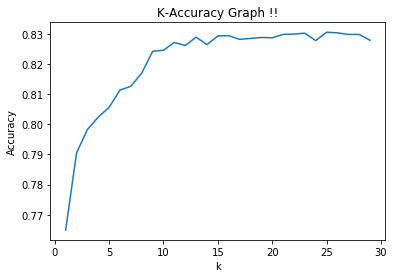

In [20]:
# importing the required module 
import matplotlib.pyplot as plt 

# x axis values 
x = list(accuracy_dict.keys())
# corresponding y axis values 
y = list(accuracy_dict.values())

# plotting the points 
plt.plot(x, y) 

# naming the x axis 
plt.xlabel('k') 
# naming the y axis 
plt.ylabel('Accuracy') 

# giving a title to my graph 
plt.title('K-Accuracy Graph !!') 

# function to show the plot 
plt.show() 


<font size="5"><b>C) KNN(Sklearn) on Categorical Data by Varying the value of 'K' with Cross Validation :</b></font>

In [21]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def best_accuracy_kf(inp_df,op_df,opcol,k_range,kf_splits):
    X_kf = inp_df
    y_kf = op_df
    kf = KFold(n_splits=kf_splits)
    kf.get_n_splits(X_kf)
    acc={}
    for k in range(1,k_range):
        print('For K = ',k," :")
        acckf=[]
        for train_index, test_index in kf.split(X_kf):
            print("TRAIN:", train_index, "TEST:", test_index)
            X_train_kf, X_test_kf = X_kf.iloc[train_index], X_kf.iloc[test_index]
            y_train_kf, y_test_kf = y_kf.iloc[train_index], y_kf.iloc[test_index]
            X_train_kf = pd.DataFrame(scaler.fit_transform(X_train_kf),index=X_train_kf.index, columns=X_train_kf.columns)
            X_test_kf = pd.DataFrame(scaler.transform(X_test_kf),index=X_test_kf.index, columns=X_test_kf.columns)
            neighk = KNeighborsClassifier(n_neighbors=k)
            neighk.fit(X_train_kf,y_train_kf[opcol])
            acckf.append(neighk.score(X_test_kf,y_test_kf[opcol]))
            
        accavg=np.sum(acckf)/len(acckf)
        acc[k]=accavg
    print(max(acc,key=acc.get))
    #return max(acc,key=acc.get)
    return acc

accuracy_dict_kf = best_accuracy_kf( dfobj_le.iloc[:,:],df.iloc[:,[-1]],'income', 30, 5)
accuracy_dict_kf

For K =  1  :
TRAIN: [ 6513  6514  6515 ... 32558 32559 32560] TEST: [   0    1    2 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 6513  6514  6515 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 26046 26047 26048] TEST: [26049 26050 26051 ... 32558 32559 32560]
For K =  2  :
TRAIN: [ 6513  6514  6515 ... 32558 32559 32560] TEST: [   0    1    2 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 6513  6514  6515 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 26046 26047 26048] TEST: [26049 26050 26051 ... 32558 32559 32560]
For K =  3  :


TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 26046 26047 26048] TEST: [26049 26050 26051 ... 32558 32559 32560]
For K =  18  :
TRAIN: [ 6513  6514  6515 ... 32558 32559 32560] TEST: [   0    1    2 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 6513  6514  6515 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 26046 26047 26048] TEST: [26049 26050 26051 ... 32558 32559 32560]
For K =  19  :
TRAIN: [ 6513  6514  6515 ... 32558 32559 32560] TEST: [   0    1    2 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 6513  6514  6515 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 19534 19535 19536]
TRAIN: [    

{1: 0.7680353194574752,
 2: 0.7899018585395831,
 3: 0.7969042919641722,
 4: 0.8041213028488479,
 5: 0.8066399142746448,
 6: 0.8111545336844739,
 7: 0.8104480936067763,
 8: 0.8134579734879136,
 9: 0.8135807010058507,
 10: 0.814348603869562,
 11: 0.8136115267103291,
 12: 0.8144407225994053,
 13: 0.8160069154829633,
 14: 0.8160992416980439,
 15: 0.815177790327491,
 16: 0.8166520955443112,
 17: 0.818034003812447,
 18: 0.816928395146958,
 19: 0.8160991851111612,
 20: 0.8171434205865344,
 21: 0.8174199465367129,
 22: 0.816498570615337,
 23: 0.8181877079332169,
 24: 0.8155464067140714,
 25: 0.8125058803202515,
 26: 0.8146864039828111,
 27: 0.8111236561086861,
 28: 0.812690018752893,
 29: 0.8092502577532518}

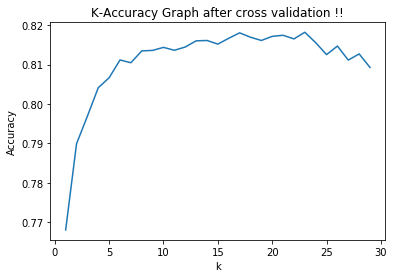

In [22]:
# importing the required module 
import matplotlib.pyplot as plt 

# x axis values 
x = list(accuracy_dict_kf.keys())
# corresponding y axis values 
y = list(accuracy_dict_kf.values())

# plotting the points 
plt.plot(x, y) 

# naming the x axis 
plt.xlabel('k') 
# naming the y axis 
plt.ylabel('Accuracy') 

# giving a title to my graph 
plt.title('K-Accuracy Graph after cross validation !!') 

# function to show the plot 
plt.show() 
